In [198]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"],  # "Times", "Palatino", "New Century Schoolbook", "Bookman", 
    })
import seaborn as sn
from  matplotlib.colors import LinearSegmentedColormap
my_cmap=LinearSegmentedColormap.from_list('rg',["r", "w", "g"], N=256) 
my_cmap_r=LinearSegmentedColormap.from_list('rg',["g", "w", "r"], N=256) 
import matplotlib.ticker as ticker
import os

In [199]:
fs = 15

# PCA and kernel PCA

## Illustration of denoising

Illustrate with linear PCA:

In [200]:
from sklearn.decomposition import PCA

In [201]:
def f(x):
    return 3*x

Shape must be: (n_samples, n_features)

Singular values: [119.20431274]
Explained   var: [0.99452639]


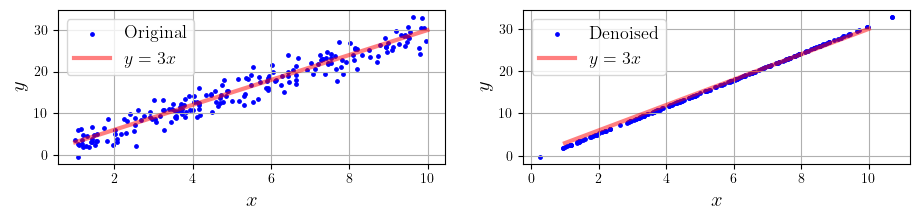

In [202]:
# Generate the data
N = 200
xmin = 1
xmax = 10
sig = 2
x_samples = np.random.uniform(xmin, xmax, size=N) 
# x_samples = x_samples.reshape((-1, 1))
y_samples = f(x_samples.flatten()) + sig * np.random.randn(len(x_samples))

# Do the PCA
pca = PCA(n_components=1)
X = np.transpose(np.array([x_samples, y_samples]))
pca.fit(X)
X_reconstructed = pca.inverse_transform(pca.transform(X))

print(f"Singular values: {pca.singular_values_}")
print(f"Explained   var: {pca.explained_variance_ratio_}")

# Plot it
fig, axs = plt.subplots(1, 2, figsize=(11,2))
s=6
for i, ax in enumerate(axs):
    # Scatterplot of datapoints
    if i == 0:
        ax.scatter(X[:, 0], X[:, 1], color="blue", s=s, label = "Original")
    else:
        ax.scatter(X_reconstructed[:, 0], X_reconstructed[:, 1], s=s, color="blue", label = "Denoised")
    # Plot the true function
    xvals = np.arange(xmin, xmax, 0.01)
    ax.plot(xvals, f(xvals), "-", color="red", lw = 3, alpha=0.5, label =  r"$y =3x$")
    ax.grid()
    ax.set_xlabel(r"$x$", fontsize=fs)
    ax.set_ylabel(r"$y$", fontsize=fs)
    ax.legend(fontsize=fs-2)

plt.savefig("Plots/illustration_denoise_PCA.pdf", bbox_inches='tight')
plt.show()

## Digits

In [203]:
from skimage.exposure import rescale_intensity

In [204]:
# Make the shape of the images a global constant
THREE_SHAPE = (16, 16)
# Load the threes dataset
threes = np.loadtxt("Data/threes.mat")
# "Transpose" (swap axes) to get in the same p x N shape
threes_T = np.swapaxes(threes, 0, 1)
dim = 256

In [205]:
def to_image(three_vector):
    """Converts a vector of threes to an image: reshape and rotate by 90 degrees"""
    
    img = np.rot90(three_vector.copy().reshape(THREE_SHAPE))
    img = rescale_intensity(img, out_range=(0,1))
    
    return img

In [206]:
# # Fit the PCA
# pca = PCA(0.85)
# pca.fit(threes)

# # Original
# example = threes[0]
# sig = 0.4
# # Noisy
# example_noise = example + sig * np.random.randn(len(example))
# # Reconstruction
# reconstructed = pca.inverse_transform(pca.transform(example_noise.reshape(1, -1))).flatten()

# # Plot it
# fig, axs = plt.subplots(1, 3, figsize=(11, 3))
# img_list = [example, example_noise, reconstructed]
# titles = [r"Original", r"Noisy", r"Reconstruction ($q = {}$)".format(pca.n_components_)]
# for i, ax in enumerate(axs):
#     # Scatterplot of datapoints
#     img = img_list[i]
#     ax.imshow(to_image(img), cmap="Greys_r")
#     ax.set_title(titles[i], fontsize=fs)
#     ax.set_xticks([])
#     ax.set_yticks([])
    
# plt.savefig("Plots/illustration_denoise_PCA_digits.pdf", bbox_inches='tight')
# plt.show()

Plot a few components

In [207]:
# pca.components_.shape

In [208]:
# # Fit the PCA
# pca = PCA(0.85)
# pca.fit(threes)

# # Original
# example = threes[0]
# sig = 0.4
# # Noisy
# example_noise = example + sig * np.random.randn(len(example))
# # Reconstruction
# reconstructed = pca.inverse_transform(pca.transform(example_noise.reshape(1, -1))).flatten()

# # Plot it
# fig, axs = plt.subplots(1, 3, figsize=(11, 3))
# img_list = pca.components_
# # titles = [r"Original", r"Noisy", r"Reconstruction ($q = {}$)".format(pca.n_components_)]
# for i, ax in enumerate(axs):
#     # Scatterplot of datapoints
#     img  = img_list[i]
# #     img += pca.mean_
#     ax.imshow(to_image(img), cmap="Greys_r")
# #     ax.set_title(titles[i], fontsize=fs)
#     ax.set_xticks([])
#     ax.set_yticks([])
    
# plt.savefig("Plots/illustration_digits_linear_PCA_principal_components.pdf", bbox_inches='tight')
# plt.show()

## Yin-Yang dataset

### Eigenvalues

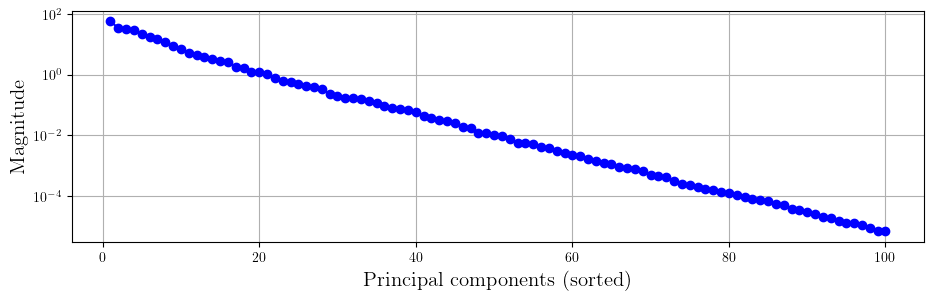

In [209]:
plt.figure(figsize=(11, 3))
eigenvals = np.loadtxt("Data/yin_yang_lambd.txt")
plt.plot([i+1 for i in range(len(eigenvals))], eigenvals, '-o', color = "blue")
plt.grid()
plt.xlabel("Principal components (sorted)", fontsize=fs)
plt.ylabel("Magnitude", fontsize=fs)
plt.yscale('log')
plt.savefig("Plots/yin_yang_eigenvals.pdf", bbox_inches = 'tight')
plt.show()

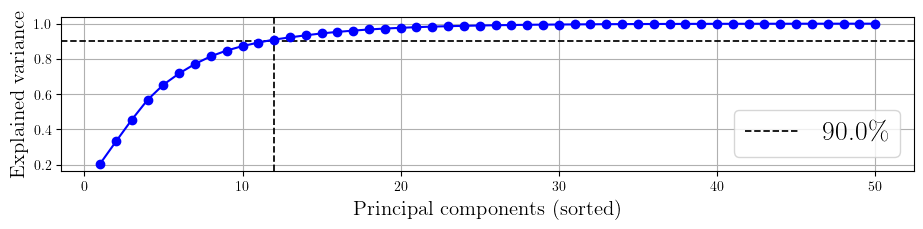

In [210]:
# Get data
eigenvals = np.loadtxt("Data/yin_yang_lambd_50.txt")
cs = np.cumsum(eigenvals)/np.sum(eigenvals)
# Plot
plt.figure(figsize = (11, 2))
plt.plot([i+1 for i in range(len(cs))], cs, '-o', color = "blue", zorder = 100)
plt.grid()
plt.xlabel("Principal components (sorted)", fontsize=fs)
plt.ylabel("Explained variance", fontsize=fs)
threshold = 0.9
index = np.argwhere(cs > threshold)[0][0]
plt.axvline(index+1, color = "black", linestyle = "--", lw = 1.25, label = f"{100*threshold}\%")
plt.axhline(threshold, color = "black", linestyle = "--", lw = 1.25)
# plt.yscale('log')
plt.legend(fontsize = 20)
plt.savefig("Plots/yin_yang_eigenvals_cumsum.pdf", bbox_inches = 'tight')
plt.show()

### Tuning

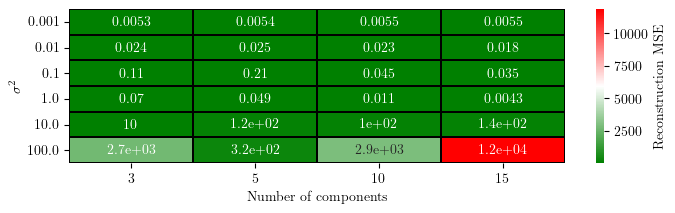

In [211]:
digits_tuned = pd.read_csv("Data/yin_yang_tuning.csv".format(name))

# Get dataframe
n_components = np.unique(digits_tuned["nc"].values)
sig2 = np.unique(digits_tuned["sig2"].values)
mse = digits_tuned["MSE"].values
mse = mse.reshape((len(sig2), len(n_components)))

# Plot it
df_for_plot = pd.DataFrame(mse, index = sig2, columns = n_components)
plt.figure(figsize = (8,2))
sn.heatmap(df_for_plot, annot=True, cmap=my_cmap_r, linewidths=0.1, linecolor='black', cbar_kws = {"label" : "Reconstruction MSE"})
plt.xlabel("Number of components")
plt.ylabel(r"$\sigma^2$")
plt.savefig("Plots/yin_yang_tuning.pdf", bbox_inches = "tight")
plt.show()

# Quadratic Renyi entropy

In [212]:
data_1 = np.loadtxt("Data/renyi_small_sig2.dat", delimiter=",")
subset_1 = np.loadtxt("Data/renyi_small_sig2_subset.dat", delimiter=",")

data_2 = np.loadtxt("Data/renyi_normal_sig2.dat", delimiter=",")
subset_2 = np.loadtxt("Data/renyi_normal_sig2_subset.dat", delimiter=",")

data_3 = np.loadtxt("Data/renyi_large_sig2.dat", delimiter=",")
subset_3 = np.loadtxt("Data/renyi_large_sig2_subset.dat", delimiter=",")

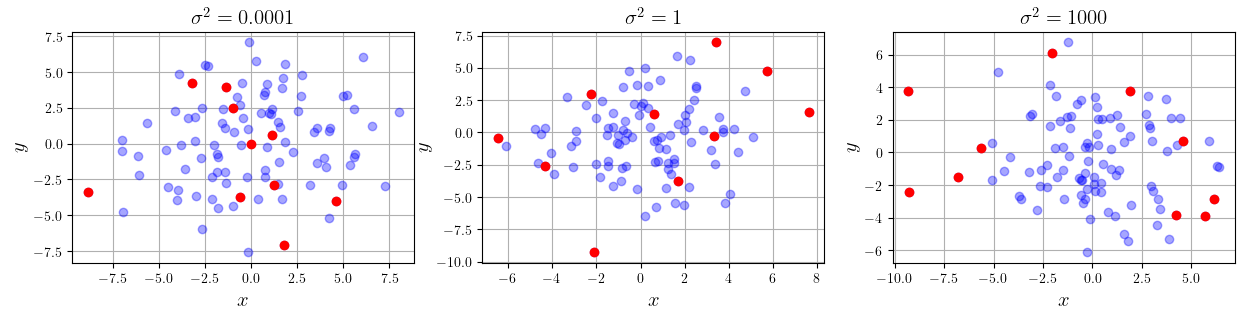

In [213]:
data_list = [data_1, data_2, data_3]
subset_list = [subset_1, subset_2, subset_3]
titles = [r"$\sigma^2 = 0.0001$", r"$\sigma^2 = 1$", r"$\sigma^2 = 1000$"]

fig, axs = plt.subplots(1,3,figsize=(15,3))
for i, ax in enumerate(axs):
    data = data_list[i]
    subset = subset_list[i]
    ax.scatter(data[:, 0], data[:, 1], color="blue", zorder=100, alpha=0.35)
    ax.scatter(subset[:, 0], subset[:, 1], color="red", zorder=100)
    ax.set_xlabel(r"$x$", fontsize=fs)
    ax.set_ylabel(r"$y$", fontsize=fs)
    ax.set_title(titles[i], fontsize=fs)
    ax.grid()
plt.savefig("Plots/renyi_sig2.pdf", bbox_inches='tight')
plt.show()

# Digits tuning

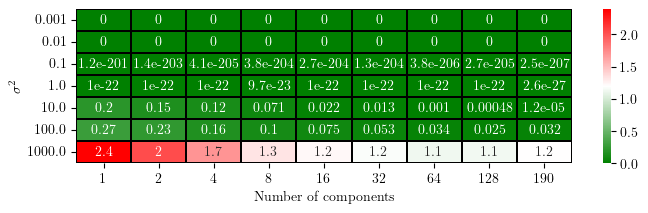

In [214]:
name = "_Xtest2"
digits_tuned = pd.read_csv("Data/digitsdn_tuning_results{}.csv".format(name))

# Get dataframe
n_components = np.unique(digits_tuned["nc"].values)
sig2 = np.unique(digits_tuned["sig2"].values)
mse = digits_tuned["MSE"].values
mse = mse.reshape((len(sig2), len(n_components)))

# Plot it
df_for_plot = pd.DataFrame(mse, index = sig2, columns = n_components)
plt.figure(figsize = (8,2))
sn.heatmap(df_for_plot, annot=True, cmap=my_cmap_r, linewidths=0.1, linecolor='black')
plt.xlabel("Number of components")
plt.ylabel(r"$\sigma^2$")
plt.savefig("Plots/digitsdn_tuned{}.pdf".format(name), bbox_inches = "tight")
plt.show()

In [215]:
# df_for_plot = pd.DataFrame(mse, index = sig2, columns = n_components)
# plt.figure(figsize = (8,2))
# sn.heatmap(df_for_plot, annot=True, cmap=my_cmap_r, linewidths=0.1, linecolor='black')
# plt.xlabel("Number of components")
# plt.ylabel(r"$\sigma^2$")
# plt.savefig("Plots/digitsdn_tuned_1.pdf", bbox_inches = "tight")
# plt.show()

In [216]:
# df_for_plot = pd.DataFrame(mse2, index = sig2, columns = n_components)
# plt.figure(figsize = (8,2))
# sn.heatmap(df_for_plot, annot=True, cmap=my_cmap_r, linewidths=0.1, linecolor='black')
# plt.xlabel("Number of components")
# plt.ylabel(r"$\sigma^2$")
# plt.savefig("Plots/digitsdn_tuned_2.pdf", bbox_inches = "tight")
# plt.show()

# Digits eigenvalues

COnfusion

In [217]:
def kernel(x, sigma):
    return np.exp(-x**2/sigma**2)

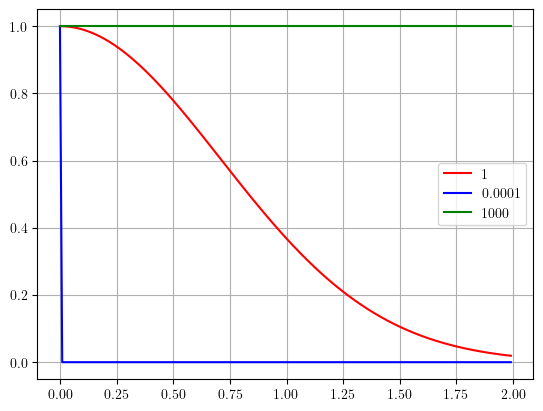

In [218]:
xvals = np.arange(0, 2, 0.01)
plt.plot(xvals, kernel(xvals, 1), color="red", label = "1")
plt.plot(xvals, kernel(xvals, 0.0001), color="blue", label = "0.0001")
plt.plot(xvals, kernel(xvals, 1000), color="green", label = "1000")
plt.legend()
plt.grid()
plt.show()

Plot the eigenvalues for insights:

In [219]:
eigenvals_dict = {}
sig2_list = [0.0001, 0.0010, 0.5000, 100.000, 200.000]
sig2_names = ["0.0001", "0.0010", "0.5000", "100.0000", "200.0000"]

sig2_list = [0.0001, 10.0000, 100.0000, 1000.0000] # , 1000000.000
sig2_names = ["0.0001", "10.0000", "100.0000", "1000.0000"] # "1000000.0000"

for i, sig2 in enumerate(sig2_list):
    name = f"Data/digitsdn_lambda_{sig2_names[i]}.txt"
    eigenvals = np.loadtxt(name)
    eigenvals_dict[sig2] = eigenvals
eigenvals =  np.loadtxt(f"Data/digitsdn_lambda_lin.txt")
eigenvals_dict["Linear"] = eigenvals

Plot

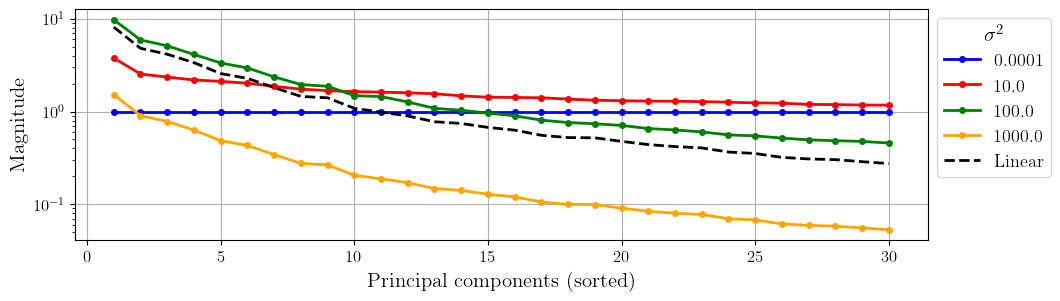

In [220]:
# Plot hyperparams
plt.figure(figsize=(11, 3))
cutoff = 30
lw=2
plot_cumsum = False
colors = ["blue", "red", "green", "orange", "black", "black"]

legend = ["0.0001", "10", "100", "Linear"]

# Plot
for i, key in enumerate(eigenvals_dict.keys()):
    eigenvals = eigenvals_dict[key]
    eigenvals = eigenvals[:cutoff]
    cs = np.cumsum(eigenvals)/np.sum(eigenvals)
    if plot_cumsum:
        vals = cs
        plt.ylabel("Cumulative sum", fontsize=fs)
    else:
        vals = eigenvals
        plt.ylabel("Magnitude", fontsize=fs)
    # Now plot!
    if key == "Linear":
        plt.plot([i+1 for i in range(len(cs))], vals, '--', ms=4, color="Black", lw=lw, label = key)
    else:
        plt.plot([i+1 for i in range(len(cs))], vals, '-o', ms=4, color=colors[i], lw=lw, label = key)
plt.grid()
plt.xlabel("Principal components (sorted)", fontsize=fs)
plt.legend(fontsize=fs-2, bbox_to_anchor=(1,1), title = r"$\sigma^2$", title_fontsize=fs)
plt.xticks(fontsize=fs-3)
plt.yticks(fontsize=fs-3)
plt.yscale('log')
plt.savefig("Plots/digitsdn_lambda_plot.pdf", bbox_inches = 'tight')
plt.show()

# Shuttle dataset (classification)

In [274]:
N = 2000
s=4
colors = ["blue", "orange", "yellow", "purple", "green", "red", "black"]

In [275]:
from sklearn.manifold import TSNE

In [276]:
shuttle = np.loadtxt("Data/shuttle.dat", delimiter=",")
indices = np.random.choice(len(shuttle), size=N, replace=False)
shuttle = shuttle[indices]

In [277]:
X = shuttle[:, 0:8]
y = shuttle[:, 9]

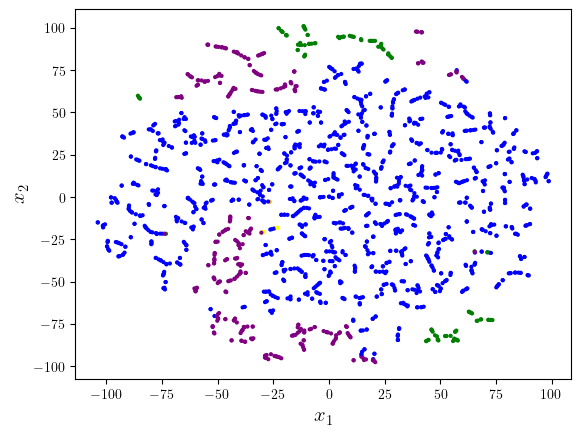

In [278]:
X_embedded = TSNE(n_components = 2, learning_rate = 'auto', init = 'random', perplexity = 3).fit_transform(X)
color_vec = [colors[int(i - 1)] for i in y]
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], s=s, c=color_vec)
# plt.title("Shuttle (T-SNE)")
plt.xlabel(r"$x_1$", fontsize=fs)
plt.ylabel(r"$x_2$", fontsize=fs)
plt.savefig("Plots/shuttle_tsne.pdf", bbox_inches = 'tight')
plt.show()

# California data

In [279]:
california = np.loadtxt("Data/california.dat", delimiter=",")
indices = np.random.choice(len(california), size=N, replace=False)
california = california[indices]
california.shape

(2000, 9)

In [280]:
X = california[:, 0:7]
y = california[:, -1]

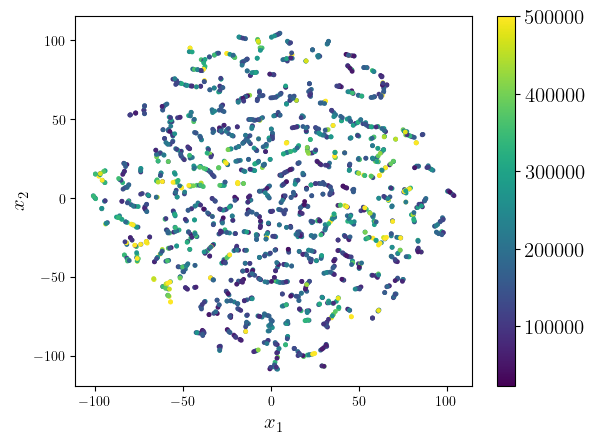

In [283]:
X_embedded = TSNE(n_components = 2, learning_rate = 'auto', init = 'random', perplexity = 3).fit_transform(X)

plt.scatter(X_embedded[:, 0], X_embedded[:, 1], s=s+2, c=y)
plt.xlabel(r"$x_1$", fontsize=fs)
plt.ylabel(r"$x_2$", fontsize=fs)
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=fs)
plt.savefig("Plots/california_tsne.pdf", bbox_inches = 'tight')
plt.show()